In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.filters import gaussian
%matplotlib inline

In [2]:
def show_image(image,title="image",cmap_type="gray"):
    plt.imshow(image,cmap_type)
    plt.title(title)
#     plt.axis("off")

In [4]:
def gaussian_blur(image,kernel_size):
    return cv2.GaussianBlur(image,(kernel_size,kernel_size),0)

In [5]:
def perespective_transform(src_pts,dst_pts):
    M = cv2.getPerspectiveTransform(src_pts,dst_pts)
    Minv = cv2.getPerspectiveTransform(dst_pts,src_pts)
    return M,Minv

In [6]:
def warp_perespective_transform(img,img_size,m):
    return cv2.warpPerspective(img,m,img_size,cv2.INTER_LINEAR)

In [7]:
def get_edges(img):
    return cv2.Canny(img,200,100)

In [66]:
def roi(img,vertices):
    #we take the image and the vertices of region of interest and return green colored roi on the image
    mask = np.zeros_like(img)
    number_of_channels = img.shape[2]
    mask_matching_channels = (255,) * number_of_channels
    cv2.fillPoly(mask,[vertices],mask_matching_channels)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
    

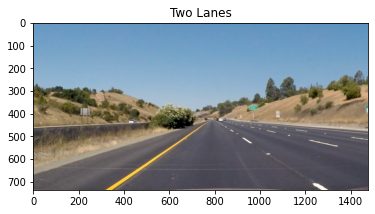

In [73]:
lane_image = cv2.imread("C:/Users/mohamed/Desktop/SENIOR YEAR PROJECTS/Image processing/lanes2.png")
lane_image = cv2.cvtColor(lane_image,cv2.COLOR_BGR2RGB)
show_image(lane_image,"Two Lanes")

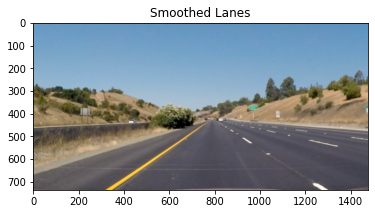

In [74]:
smoothed_lanes = gaussian_blur(lane_image,5)
show_image(smoothed_lanes,"Smoothed Lanes")

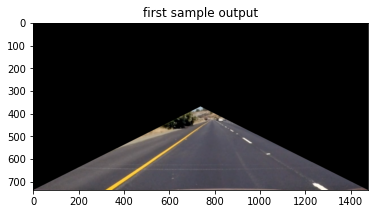

In [75]:

height = smoothed_lanes.shape[0]
width = smoothed_lanes.shape[1]
# ROI = np.array([[0 ,height],[width//2, height//2],[width ,height]])
vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]
sample_output_image = roi(smoothed_lanes,np.array([vertices], np.int32),)
show_image(sample_output_image,"ٌRegion of ")